<a href="https://colab.research.google.com/github/Gressling/digitalchemistry.org/blob/main/batch_analysis/unitOperationsS88/TemperatureProfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parsed Target Temperatures:  [25, 50.0, 50.0, 110.0, nan, 25]
Parsed Durations:  [1500.0, 3600.0, 3600.0, 3600]


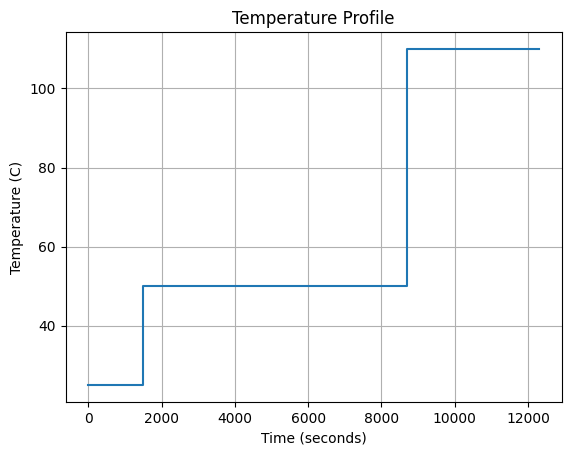

In [22]:
# Import required libraries
import requests
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Fetch XML data from the URL
url = 'https://raw.githubusercontent.com/Gressling/S88-light/main/operations/TemperatureProfile/TemperatureProfile-Example.xml'
response = requests.get(url)
root = ET.fromstring(response.content)

# Initialize lists to store target temperatures and durations
target_temperatures = [25]  # Starting at room temperature 25°C
durations = []

# Parse XML to extract target temperatures and durations
for step in root.findall('./Temperature'):
    target_temperature_text = step.find('TargetTemperature').text
    duration = float(step.find('Duration').text)

    # Replace 'Infinitesimal' with a placeholder value, e.g., float('nan')
    if target_temperature_text == 'Infinitesimal' or target_temperature_text == '':
        target_temperature = float('nan')
    else:
        target_temperature = float(target_temperature_text)

    # Replace duration of 0 with 3600 seconds (1 hour)
    if duration == 0:
        duration = 3600

    target_temperatures.append(target_temperature)
    durations.append(duration)

# Add room temperature at the end
target_temperatures.append(25)

# List parsed values
print("Parsed Target Temperatures: ", target_temperatures)
print("Parsed Durations: ", durations)

# Calculate time points for plotting
time_points = [0]
for duration in durations:
    time_points.append(time_points[-1] + duration)

# Add final time point for returning to room temperature
time_points.append(time_points[-1])

# Plotting
plt.step(time_points, target_temperatures, where='post')
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (C)')
plt.title('Temperature Profile')
plt.grid(True)
plt.show()
